In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Times New Roman',
          'font.size': 15,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

# results = np.load("./output/results.npy").reshape(61, 30, 100, 400) # 时刻 种类
# n = np.load("./output/porosity.npy").reshape(61, 100, 400)
# K = np.load("./output/K.npy").reshape(61, 100, 400)

zimu = "B"
nlay = 50
ncol = 200

cishu = 60*5

results = np.load(f"./output/{zimu}/results.npy").reshape(cishu+1, 10, nlay, ncol) # 时刻 种类
n = np.load(f"./output/{zimu}/results_porosity.npy").reshape(cishu+1, nlay, ncol)
K = np.load(f"./output/{zimu}/results_K.npy").reshape(cishu+1, nlay, ncol)
K_log = np.log(K)

print(results.shape)
print(n.shape)
print(K.shape)
# print(heads.shape)

# ['0 K' '1 Na' '2 Ca' '3 Mg' '4 Li' '5 Cl' '6 S(6)' '7 C(4)' '8 Halite'
#  '9 Carnallite' '10 Polyhalite' '11 Sylvite' '12 Gypsum' '13 Calcite' '14 Dolomite'
#  '15 d_Halite' '16 d_Carnallite' '17 d_Polyhalite' '18 d_Sylvite' '19 d_Gypsum' '20 d_Calcite' '21 d_Dolomite'
#  '22 density(kg/m3)'
#  '23 SI_Halite' '24 SI_Carnallite' '25 SI_Polyhalite' '26 SI_Sylvite' '27 SI_Gypsum' '28 SI_Calcite' '29 SI_Dolomite']

# 0 Halite   1 Carnallite   2 Polyhalite   3 Sylvite   4 Gypsum 
# 5 d_Halite 6 d_Carnallite 7 d_Polyhalite 8 d_Sylvite 9 d_Gypsum

(301, 10, 50, 200)
(301, 50, 200)
(301, 50, 200)


In [2]:
# 固液转换效率（示例）
R1 = results[:60,  6].sum(0).sum() * (-1) / results[0, 1].sum() * 100
R2 = results[:120, 6].sum(0).sum() * (-1) / results[0, 1].sum() * 100
R3 = results[:180, 6].sum(0).sum() * (-1) / results[0, 1].sum() * 100
R4 = results[:240, 6].sum(0).sum() * (-1) / results[0, 1].sum() * 100
R5 = results[:300, 6].sum(0).sum() * (-1) / results[0, 1].sum() * 100
# R2 = ((results[-1, 1, :, :] - results[0, 1, :, :]) / results[0, 1, :, :] * 100).mean() * (-1)
# 波及效率（阈值10%）
E = (((results[0, 1, :, :] - results[-1, 1, :, :]) / results[0, 1, :, :]) > 0.1).sum() / results[0, 1, :, :].size * 100

print(f"第 1 年 固液转换效率 R = {R1:.2f}%")
print(f"第 2 年 固液转换效率 R = {R2:.2f}%")
print(f"第 3 年 固液转换效率 R = {R3:.2f}%")
print(f"第 4 年 固液转换效率 R = {R4:.2f}%")
print(f"第 5 年 固液转换效率 R = {R5:.2f}%")
print(f"波及效率 E = {E:.2f}%")


第 1 年 固液转换效率 R = 59.64%
第 2 年 固液转换效率 R = 69.79%
第 3 年 固液转换效率 R = 74.98%
第 4 年 固液转换效率 R = 77.80%
第 5 年 固液转换效率 R = 80.05%
波及效率 E = 82.16%


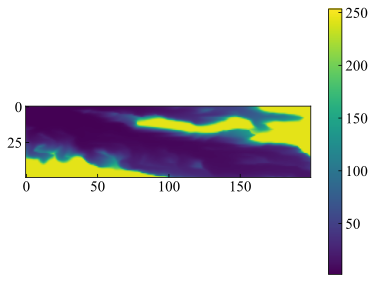

In [3]:
plt.imshow(results[:, 1].sum(0))
plt.colorbar()


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# kuangwuxinghao = 9

# # 原始的百分比变化数据
# data_to_plot_percent = [
#     # (results[i, kuangwuxinghao, :, :] - results[0, kuangwuxinghao, :, :]) / results[0, kuangwuxinghao, :, :] *100
#     results[i, kuangwuxinghao, :, :]
#     for i in range(1, cishu+1, 2)
# ]

# # 计算全局的 vmin 和 vmax，便于统一色标
# all_values = np.concatenate([arr.flatten() for arr in data_to_plot_percent])
# vmin = np.min(all_values)
# vmax = np.max(all_values)

# # 布局
# n_rows, n_cols = 6, 5
# fig, axes = plt.subplots(
#     n_rows, n_cols,
#     figsize=(10, 6),
#     constrained_layout=True
# )
# axes = axes.flatten()
# time_points = list(range(1, cishu+1, 100))
# # 绘图循环
# for idx, arr in enumerate(data_to_plot_percent):
#     ax = axes[idx]
#     mappable = ax.imshow(
#         arr,
#         cmap="jet",
#         vmin=vmin,
#         vmax=vmax,
#         aspect='auto'
#     )
#     # ax.set_title(f'K[{idx*2+1}] - K[0] (%)')
#     ax.set_xticks([])
#     ax.set_yticks([])

#     # 计算当前时刻对应的“年”
#     t = time_points[idx]       # 原始时刻编号：1,3,5,...
#     year = t * 0.083        # 0–9→1年；10–19→2年；20–29→3年

#     # 在坐标轴的右下角添加文本
#     ax.text(
#         0.95, 0.05,      # 坐标轴内位置 (x, y)，右下角
#         f'第 ${year:.2f}$ 年',
#         transform=ax.transAxes,
#         fontdict={'family': 'SimSun'},
#         ha='right', va='bottom',
#         fontsize=12,
#         color='white',
#     )
# # 删除多余的子图
# for ax in axes[len(data_to_plot_percent):]:
#     fig.delaxes(ax)

# # 添加 colorbar
# cbar = fig.colorbar(
#     mappable,
#     ax=axes[:len(data_to_plot_percent)].tolist(),
#     location='bottom',
#     pad=0.01,
#     aspect=80,
#     format='%.3f',
#     shrink=0.6
# )
# # cbar.set_label('Percentage Change (%)')

# # 显示图像
# plt.show()

In [5]:
import flopy
import numpy as np
import matplotlib.pyplot as plt

model_ws = "./simulation/"
model_name = "model"

# 读取离散化文件（DIS）
sim = flopy.mf6.MFSimulation.load(sim_ws=model_ws, sim_name=model_name, verbosity_level=0)
gwf = sim.get_model("gwf_model")
bud = sim.get_model("gwf_model").output.budget()  # 不需要手动给文件名
# 读取所有SPDIS数据
spdis_all = bud.get_data(text='DATA-SPDIS')
# spdis_all = bud.get_data(text='FLOW-JA-FACE')

# 初始化空列表
qx_list, qy_list, qz_list, speed_list = [], [], [], []

# 循环计算每个时刻的比流量和流速
i = 1
for spdis in spdis_all:
    qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
    # 如果想要孔隙水速，就除以 porosity
    qx = qx.reshape(nlay, ncol) / n[i]
    qy = qy.reshape(nlay, ncol) / n[i]
    qz = qz.reshape(nlay, ncol) / n[i]
    
    speed = np.sqrt(qx**2 + qy**2 + qz**2)
    i += 1
    qx_list.append(qx)
    qy_list.append(qy)
    qz_list.append(qz)
    speed_list.append(speed)

# 堆叠为numpy数组，第0维是时间
qx_arr = np.stack(qx_list, axis=0)
qy_arr = np.stack(qy_list, axis=0)
qz_arr = np.stack(qz_list, axis=0)
speed_arr = np.stack(speed_list, axis=0)

print("qx_arr shape:", qx_arr.shape)   # (ntime, nlay, nrow, ncol)
print("speed_arr shape:", speed_arr.shape)

qx_arr shape: (300, 50, 200)
speed_arr shape: (300, 50, 200)


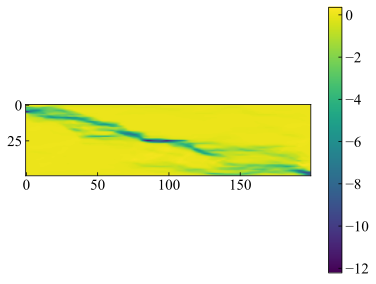

In [6]:
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis_all[100], gwf)
plt.imshow(qy[:,:,0])
plt.colorbar()

In [7]:
len(spdis_all)

300

In [8]:
density = sim.get_model("gwf_model").buy.output.density().get_alldata()

print(density.shape)

plt.subplots(1, 1, figsize=(4, 1.6))
plt.imshow(density[-1, :,:,0], cmap="jet", aspect='auto',)
plt.colorbar()

AttributeError: buy

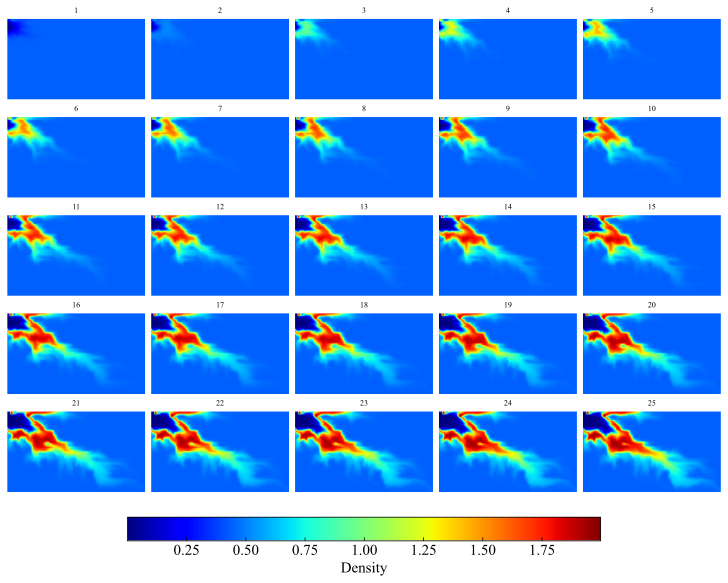

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 density.get_alldata() 返回的形状是 (60, H, W, 1)
# data = density.get_alldata()[:, :, :, 0]

data = sim.get_model("gwt_K_model").output.concentration().get_alldata()[:, :, :, 0]

# 定义行列数
nrows, ncols = 5, 5

# 创建子图，调整间距
fig, axes = plt.subplots(
    nrows, ncols, 
    figsize=(10, 8),          # 根据需要调整总图大小
    constrained_layout=True   # 自动调整间距
)

# 将 axes 转为一维方便索引
axes = axes.ravel()

# 找到所有数据的最大最小值（共享 color scale）
vmin, vmax = data.min(), data.max()

# 绘制每一张子图
for i in range(nrows * ncols):
    im = axes[i].imshow(data[i], cmap='jet', aspect='auto', vmin=vmin, vmax=vmax)
    axes[i].set_title(f'{i+1}', fontsize=8)
    axes[i].axis('off')

# 只在最下面添加一个 colorbar（横向）
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Density')

plt.show()


In [10]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 假设 density.get_alldata() 返回的形状是 (60, H, W, 1)
# data = density.get_alldata()[:, :, :, 0]

# # 定义行列数
# nrows, ncols = 6, 5

# # 创建子图，调整间距
# fig, axes = plt.subplots(
#     nrows, ncols, 
#     figsize=(10, 8),          # 根据需要调整总图大小
#     constrained_layout=True   # 自动调整间距
# )

# # 将 axes 转为一维方便索引
# axes = axes.ravel()

# # 找到所有数据的最大最小值（共享 color scale）
# vmin, vmax = data.min(), data.max()

# # 绘制每一张子图
# for i in range(nrows * ncols):
#     im = axes[i].imshow(data[i], cmap='jet', aspect='auto', vmin=vmin, vmax=vmax)
#     axes[i].set_title(f'{i+1}', fontsize=8)
#     axes[i].axis('off')

# # 只在最下面添加一个 colorbar（横向）
# cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
# cbar.set_label('Density')

# plt.show()


In [11]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
# import numpy as np

# # 假设 speed_arr.shape = (30, 100, 400, 1)
# speed_arr = np.squeeze(speed_arr)  # -> (30, 100, 400)

# # 全局颜色范围
# vmin = 1e-4 #speed_arr.min() #+ 1e-6
# vmax = 0.05 #speed_arr.max()

# # 布局参数
# n_time = speed_arr.shape[0]
# ncols = 5
# nrows = int(np.ceil(n_time / ncols))

# # 创建图形和子图
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 1.0 * nrows))
# fig.subplots_adjust(wspace=0.05, hspace=0.15, bottom=0.18)  # 更紧凑的布局

# axes = axes.flatten()

# # 绘制每个时刻
# for i in range(n_time):
#     ax = axes[i]
#     im = ax.imshow((speed_arr[i, :, :]-speed_arr[0, :, :]), cmap="jet", aspect='auto', norm=LogNorm(vmin=vmin, vmax=vmax))
#     ax.set_title(f"Time {i+1}", fontsize=8)
#     ax.axis("off")

# # 去掉空白子图
# for j in range(n_time, len(axes)):
#     axes[j].axis("off")

# # ✅ 在底部添加统一 colorbar（横向）
# cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [left, bottom, width, height]
# cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
# cbar.set_label("Speed (m/d)")

# plt.show()


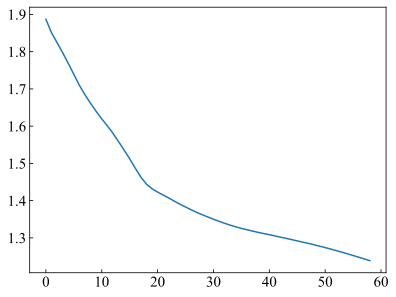

In [9]:
aat = []
for i in range(1, 60):
    aa = speed_arr[i, :, :]# - speed_arr[i-1, :, :]
    aat.append(aa.mean())

plt.plot(aat)

qz_arr shape:  (300, 50, 200)
qy_arr shape:  (300, 50, 200)


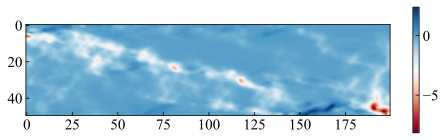

In [10]:
print("qz_arr shape: ", qz_arr.shape)
print("qy_arr shape: ", qy_arr.shape)

plt.figure(figsize=(18,5))
plt.subplot(221)
plt.imshow(qz_arr[0, :, :], cmap="RdBu")
plt.colorbar()



In [30]:
# print("qz_arr shape: ", qz_arr.shape)
# print("qy_arr shape: ", qy_arr.shape)

# plt.figure(figsize=(18,5))
# plt.subplot(221)
# plt.imshow(qz_arr[0, :, :], cmap="RdBu", norm=LogNorm(vmin=speed_arr.min(), vmax=speed_arr.max()))
# plt.colorbar()
# plt.subplot(222)
# plt.imshow(qz_arr[-1, :, :], cmap="RdBu", norm=LogNorm(vmin=speed_arr.min(), vmax=speed_arr.max()))
# plt.colorbar()
# plt.subplot(223)
# plt.imshow(qy_arr[1, :, :], norm=LogNorm(vmin=speed_arr.min()+1e-6, vmax=speed_arr.max()))
# plt.colorbar()
# plt.subplot(224)
# plt.imshow(qy_arr[-1, :, :], norm=LogNorm(vmin=speed_arr.min()+1e-6, vmax=speed_arr.max()))
# plt.colorbar()

In [15]:
bud.get_data(text='DATA-SPDIS')[20]['qy']

array([-0.26392399, -0.24879893, -0.21298563, ..., -2.75139882,
       -3.43611808, -3.73415457])

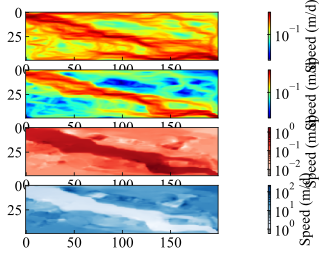

In [14]:


plt.figure(figsize=(18,4))
plt.subplot(411)

im = plt.imshow(speed_arr[0, :, :], cmap="jet", norm=LogNorm(vmin=speed_arr[-1, :, :].min()+1e-6, vmax=speed_arr[-1, :, :].max()))
# plt.contour(speed30[:,:,0], color="black", norm=LogNorm(vmin=speed30.min()+1e-6, vmax=speed30.max()))
cbar = plt.colorbar(im)
cbar.set_label('Speed (m/d)')

plt.subplot(412)

im = plt.imshow(speed_arr[-1, :, :], cmap="jet", norm=LogNorm(vmin=speed_arr[-1, :, :].min()+1e-6, vmax=speed_arr[-1, :, :].max()))
# plt.contour(speed30[:,:,0], color="black", norm=LogNorm(vmin=speed30.min()+1e-6, vmax=speed30.max()))
cbar = plt.colorbar(im)
cbar.set_label('Speed (m/d)')

plt.subplot(413)
cha = speed_arr[-1, :, :] / speed_arr[0, :, :]
cha_ = speed_arr[0, :, :] / speed_arr[-1, :, :]
im = plt.imshow(cha, cmap="Reds", norm=LogNorm(vmin=cha.min(), vmax=cha.max()))
# im = plt.imshow(cha_, cmap="Blues_r", norm=LogNorm(vmin=1e-6, vmax=cha_.max()))
cbar = plt.colorbar(im)
cbar.set_label('Speed (m/d)')
plt.subplot(414)
# cha = speed_arr[-1, :, :]/speed_arr[0, :, :]
cha_ = speed_arr[0, :, :]/speed_arr[-1, :, :]
# im = plt.imshow(cha, cmap="Reds", norm=LogNorm(vmin=1e-2, vmax=cha.max()))
im = plt.imshow(cha_, cmap="Blues", norm=LogNorm(vmin=cha_.min(), vmax=cha_.max()))

# plt.contour(speed30[:,:,0], color="black", norm=LogNorm(vmin=speed30.min()+1e-6, vmax=speed30.max()))
cbar = plt.colorbar(im)
cbar.set_label('Speed (m/d)')

In [17]:
# print("流速: ", vy[:,:,0].min(), vy[:,:,0].max())
# liusu = np.abs(vy[:,:,0])
# liusu = np.log(liusu)
# plt.imshow(liusu, cmap="jet")
# plt.colorbar()

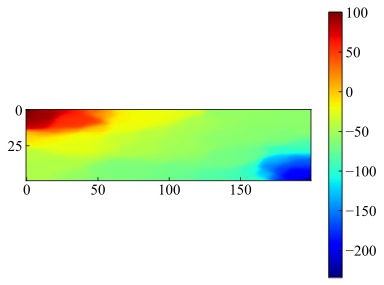

In [11]:
head = gwf.oc.output.head().get_alldata()
head.shape

plt.imshow(head[-1, :, :, 0], cmap="jet")
plt.colorbar()
# plt.contour(head[-1, :, :, 0])

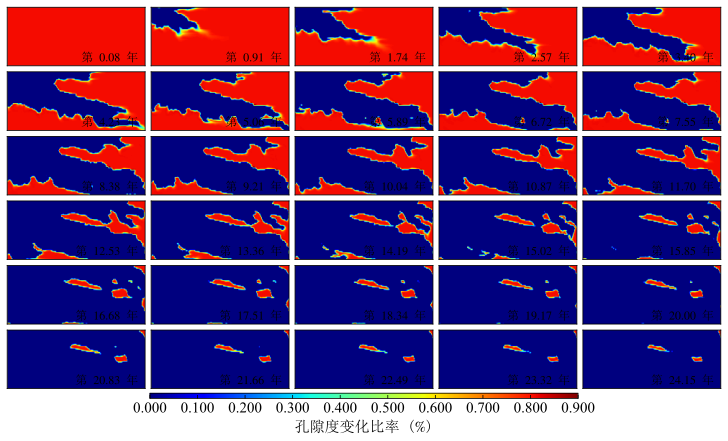

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

data_to_plot_percent = [results[i, 1, :, :] for i in range(1, cishu+1, int(cishu/30))] #  - n[0, :, :]) / n[0, :, :] * 100

data_to_plot_log = []
for arr_percent in data_to_plot_percent:
    mask = (arr_percent <= 0) | (arr_percent < 1e-4)
    masked_arr = np.ma.array(arr_percent, mask=mask)
    data_to_plot_log.append(masked_arr)

all_positive_values = np.concatenate([arr.compressed() for arr in data_to_plot_log])

# if len(all_positive_values) > 0:
#     log_vmin = np.min(all_positive_values)
#     log_vmax = np.max(all_positive_values)
#     if log_vmin < 1e-4:
#         log_vmin = 1e-4
# else:
#     log_vmin = 1e-4
#     log_vmax = 1.0

# if log_vmin >= log_vmax:
#     log_vmax = log_vmin * 10
# print(log_vmin)
# print(log_vmax)
log_vmin = 0.0
log_vmax = 0.9
n_rows, n_cols = 6, 5
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(10, 6),
    constrained_layout=True    # <— 打开 constrained_layout
)
axes = axes.flatten()
time_points = list(range(1, cishu+1, int(cishu/30)))

for idx, arr_log in enumerate(data_to_plot_percent):
    ax = axes[idx]
    norm = LogNorm(vmin=log_vmin, vmax=log_vmax)
    mappable = ax.imshow(arr_log, cmap="jet", aspect='auto', vmin=log_vmin, vmax=log_vmax) # norm=norm, 
    # ax.set_title(f'K[{idx*2+1}] - K[0] (%)')
    ax.set_xticks([])
    ax.set_yticks([])

    # 计算当前时刻对应的年
    t = time_points[idx]
    year = t * 0.083

    ax.text(
        0.95, 0.05,
        f'第 ${year:.2f}$ 年',
        transform=ax.transAxes,
        fontdict={'family': 'SimSun'},
        ha='right', va='bottom',
        fontsize=12,
        # color='white',
    )

for ax in axes[len(data_to_plot_log):]:
    fig.delaxes(ax)

cbar = fig.colorbar(
    mappable,
    ax=axes[:len(data_to_plot_log)].tolist(),
    location='bottom',
    pad=0.01,
    aspect=80,
    format='%.3f',
    shrink=0.6
)

cbar.set_label(r'孔隙度变化比率 ($\mathrm{\%}$)', fontdict={'family': 'SimSun'})

plt.show()